# A quick look at the depth-age relationship for the seafloor.

We can obtain the global (ocean) age grid from the University of Sydney Earthbyte Group (https://www.earthbyte.org/Resources/agegrid2008.html). 
The data should look like this when plotted on a map.

![ocean_age_molleweide_180.png](./Images/ocean_age_molleweide_180.png)

Note: I downloaded this file: age.3.6.nc which is "A short integer netCDF formatted file.
The age units are in millions of years, multiplied by 100 (to enable storage as short  The file spans longitudes from 0 E to
360 E and latitudes from 90 N to -90 N. 6 minute resolution, gridline-registered." 

The ftp site where this data is stored does not serve the data in a way that xarray can read but otherwise it should be similar to what we did for the topography / bathymetry data. 


### References

Müller, R.D., Sdrolias, M., Gaina, C. and Roest, W.R., 2008, Age spreading rates and spreading asymmetry of the world's ocean crust,
Geochemistry, Geophysics, Geosystems, 9, Q04006, doi:10.1029/2007GC001743

## Read the data and make a plot 

Let's see if the data are what we expect given the Earthbyte image above.
We will need to import `xarray` to read the compressed file.

In [1]:
import xarray
import numpy as np

age_dataset = "../Data/age.3.6.nc"
age_data = xarray.open_dataset(age_dataset)
subs_data = age_data.sel(x=slice(-180,180, 1), y=slice(-90, 90, 1))

lons = subs_data.coords.get('x')
lats = subs_data.coords.get('y')
vals = subs_data['z']

x,y = np.meshgrid(lons.data, lats.data)
age = vals.data

ModuleNotFoundError: No module named 'xarray'

NameError: name 'age' is not defined

/usr/share/miniconda3/envs/jupyter/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


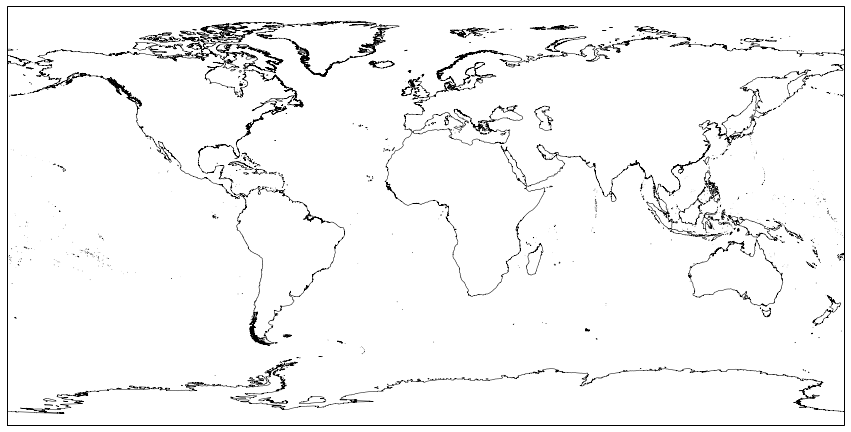

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import cartopy.crs as ccrs
import cartopy.feature as cfeature

map_extent = (-180, 180,-90,90)

coastline = cfeature.NaturalEarthFeature('physical', 'coastline', '10m',
                           edgecolor=(1.0,0.8,0.0),
                           facecolor="none")

plt.figure(figsize=(15, 10))
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.set_extent(map_extent)

ax.add_feature(coastline, edgecolor="black", linewidth=0.5, zorder=3)

plt.imshow(age, extent=map_extent, transform=ccrs.PlateCarree(),
           cmap='RdYlBu', origin='lower', vmin=0.0, vmax=180.0)

Is this correct ?

Well, it does not look quite right but do you think the data are scrambled or is something else wrong? 

## Debugging

Remember to read the description above. What is the range of age in the age array ? What do you expect for the Earth's oceans ?

*Hint; check the documentation for np.isnan()*